# Etapa 1: Imports e Leitura

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import lightgbm as lgb



In [2]:
import sys
from pathlib import Path

# Adiciona o diretório raiz do projeto ao sys.path para permitir imports como "from src..."
ROOT = Path().resolve().parent
sys.path.append(str(ROOT / "src"))
sys.path.append(str(ROOT))


In [3]:
from src.features import criar_variaveis_derivadas
from src.config import DATA_PATH


[OK] Configuração de diretórios concluída.


# Etapa 2: Carregamento e preparação dos dados

In [4]:
df = pd.read_csv(DATA_PATH)
df = criar_variaveis_derivadas(df)

X = df[[
    'Customer_Age', 'Dependent_count', 'Credit_Limit',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Ticket_Medio',
    'Gasto_Medio_Mensal', 'Rotativo_Ratio', 'Score_Relacionamento',
    'LTV_Proxy', 'Caiu_Valor', 'Caiu_Transacoes']]

y = df['Attrition_Flag'].map({"Attrited Customer": 1, "Existing Customer": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Etapa 3: Treinamento do modelo

In [5]:
modelo = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1139, number of negative: 5949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 7088, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160694 -> initscore=-1.653072
[LightGBM] [Info] Start training from score -1.653072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,4
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


# Etapa 4: Avaliação

In [6]:
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_proba)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2551
           1       0.88      0.78      0.83       488

    accuracy                           0.95      3039
   macro avg       0.92      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039

AUC: 0.9826


# Etapa 5: Matriz de Confusão

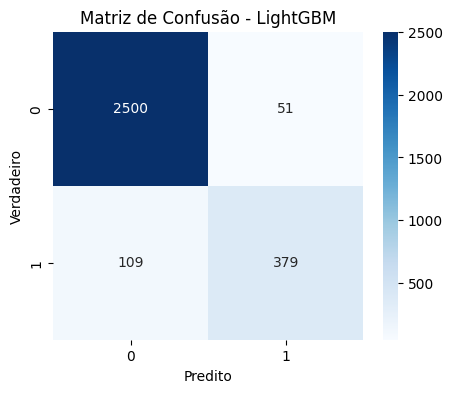

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - LightGBM")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# Etapa 6: Curva ROC

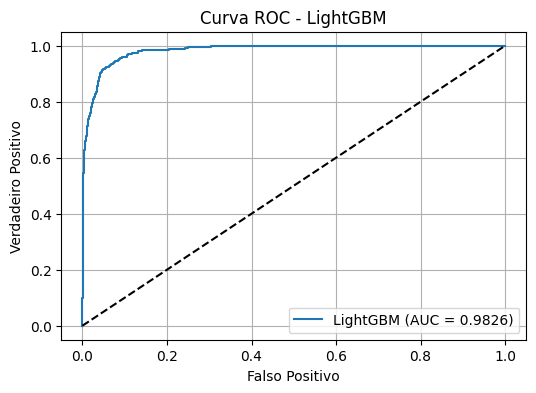

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='LightGBM (AUC = {:.4f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC - LightGBM")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.legend()
plt.grid()
plt.show()

# Etapa 7: Conclusão

In [9]:
print("\nConclusão:\nO LightGBM foi o modelo com melhor AUC dentre os testados, sendo um forte candidato à implementação final. Recomendado revisar estabilidade em outros conjuntos.")



Conclusão:
O LightGBM foi o modelo com melhor AUC dentre os testados, sendo um forte candidato à implementação final. Recomendado revisar estabilidade em outros conjuntos.
